In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = r"/content/drive/MyDrive/AS2_AI/image_data"
# folder_path = r"/content/drive/MyDrive/AS2_AI/img"

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
# def augment_data(folder_path):

#   datagen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2,rescale=1 / 255.0,
#         rotation_range=20,
#         width_shift_range=0.05,
#         height_shift_range=0.05,
#         horizontal_flip=True,
#         fill_mode="nearest")
#   count = 0
#   for f in os.listdir(folder_path):

#       img = load_img(os.path.join(folder_path,f))
#       x = img_to_array(img)
#       # Reshape the input image
#       x = x.reshape((1, ) + x.shape)
#       i = 0
#       img_name = f.split("_")[0]


#       # generate new augmented images
#       for batch in datagen.flow(x, batch_size = 1,
#                         save_to_dir ='/content/drive/MyDrive/AS2_AI/img',
#                         save_prefix =f'{img_name}_{i}', save_format ='jpeg'):
#           i += 1
#           if i > 39:
#               break

#       count += 1
#       print(f"{count} image done")

In [ ]:
# augment_data(folder_path)

1 image done
2 image done
3 image done
4 image done


In [ ]:
def collect_data(folder_path, image_data, image_label):
    for i in os.listdir(folder_path):
      if i.endswith('.jpg') or i.endswith('.jpeg') or i.endswith('.png'):
        data = cv2.imread(os.path.join(folder_path, i))

        # Check if the image was read successfully
        if data is not None:
            resized = cv2.resize(data, (128, 128))
            image_data.append(resized)

            img_label = i.split("_")[0]
            image_label.append(img_label)
        else:
            print(f"Failed to read image: {i}")

image_data = []
image_label = []
collect_data(folder_path, image_data, image_label)
image_data = np.array(image_data)
image_label = np.array(image_label)

In [ ]:
image_data[1]

In [ ]:
image_label

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
image_label = encoder.fit_transform(image_label)
image_label

In [ ]:
original_labels = encoder.inverse_transform(image_label)
original_labels

In [ ]:
np.unique(original_labels)

array(['amir', 'nischal', 'pushan', 'ritesh', 'tshering'], dtype='<U8')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (image_data, image_label, test_size=0.3, random_state=42)

In [ ]:
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
for i in [X_train, X_test, Y_train, Y_test]:
  print(i.shape)

(467, 128, 128, 3)
(201, 128, 128, 3)
(467,)
(201,)


In [ ]:
num_classes = len(np.unique(image_label))
num_classes

5

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dense, Dropout, Flatten

def create_model():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))


  model.add(Flatten())


  model.add(Dense(128, activation='relu'))

  model.add(Dense(64, activation='relu'))

  model.add(Dense(16, activation='relu'))

  model.add(Dense(5, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
model = create_model()

In [ ]:
model.fit(X_train, Y_train, validation_split=0.2, epochs=7)

Epoch 1/7
12/12 [==============================] - 4s 113ms/step - loss: 1.8561 - accuracy: 0.5201 - val_loss: 1.5510 - val_accuracy: 0.5638
Epoch 2/7
12/12 [==============================] - 0s 31ms/step - loss: 1.3214 - accuracy: 0.5818 - val_loss: 1.4372 - val_accuracy: 0.5638
Epoch 3/7
12/12 [==============================] - 0s 34ms/step - loss: 1.2365 - accuracy: 0.5818 - val_loss: 1.3495 - val_accuracy: 0.5638
Epoch 4/7
12/12 [==============================] - 0s 31ms/step - loss: 1.1457 - accuracy: 0.5818 - val_loss: 1.3410 - val_accuracy: 0.5638
Epoch 5/7
12/12 [==============================] - 0s 31ms/step - loss: 1.0920 - accuracy: 0.5818 - val_loss: 1.1481 - val_accuracy: 0.5638
Epoch 6/7
12/12 [==============================] - 0s 31ms/step - loss: 0.9147 - accuracy: 0.5871 - val_loss: 1.0293 - val_accuracy: 0.7021
Epoch 7/7
12/12 [==============================] - 0s 30ms/step - loss: 0.6567 - accuracy: 0.6944 - val_loss: 0.6800 - val_accuracy: 0.7234


In [ ]:
# model.save('/content/drive/MyDrive/AS2_AI/my_face_recognition_model.h5')

In [ ]:
import tensorflow as tf

model1 = tf.keras.models.load_model('/content/drive/MyDrive/AS2_AI/my_face_recognition_model.h5')


In [ ]:
def map_label_to_hashmap(name_mapped, original_labels, image_label):

  for i in range(len(original_labels)):
    name_mapped[original_labels[i]] = image_label[i]

  return name_mapped
name_mapped = {}
map_label_to_hashmap(name_mapped, original_labels, image_label)
print(name_mapped)

{'tshering': 4, 'nischal': 1, 'pushan': 2, 'amir': 0, 'ritesh': 3}


In [ ]:
p = X_test[133].reshape(-1, 128, 128, 3)

In [ ]:
prediction = model1.predict(p)

1/1 [==============================] - 0s 97ms/step


In [ ]:
prediction

array([[0.29626358, 0.0243664 , 0.23949322, 0.03881537, 0.40106148]],
      dtype=float32)

In [ ]:
np.argmax(prediction)

4

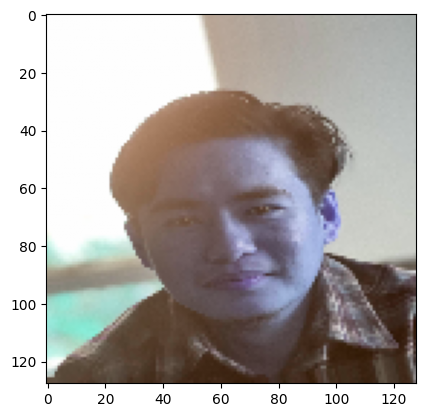

In [ ]:
plt.imshow(X_test[133])

In [ ]:
!pip install mtcnn
from mtcnn import MTCNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.1 MB/s eta 0:00:00


In [ ]:
# Load the MTCNN detector
detector = MTCNN()

# Read the test image
test_image = cv2.imread("/content/drive/MyDrive/AS2_AI/tshering.jpg")

# Detect faces using MTCNN
faces = detector.detect_faces(test_image)

# Iterate over detected faces
for face in faces:
    x, y, width, height = face["box"]

    # Draw bounding box rectangle
    cv2.rectangle(test_image, (x, y), (x + width, y + height), (255, 0, 0), 2)

    # Extract the face region
    face_region = test_image[y : y + height, x : x + width]

    # Preprocess the face region (resize, normalize, etc.)
    preprocessed_face = cv2.resize(face_region, (128, 128)) / 255.0

    # Reshape and predict using the model
    preprocessed_face = preprocessed_face.reshape(-1, 128, 128, 3)
    prediction = model1.predict(preprocessed_face)
    predicted_label = encoder.inverse_transform([np.argmax(prediction)])[0]
    # predicted_label = np.argmax(prediction)

    # Add the predicted label to the bounding box
    cv2.putText(
        test_image,
        predicted_label,
        (x, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.9,
        (36, 255, 12),
        2,
    )

# Display the image with bounding boxes and predicted labels
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

predicted_label

1/1 [==============================] - 0s 370ms/step


NameError: ignored